In [2]:
import numpy as np

import jiant.utils.python.io as py_io
import matplotlib.pyplot as plt

In [57]:
pparam = dict(xlabel='', ylabel='Evaluation Acc (\%)')

task_names1 = [
  "lexical-entail", "transitive", "hypernymy", "hyponymy", "verbnet",
  "verbcorner", "synt-alt", "synt-var", "monotonicity", "syllogism",
  "coreference", "sprl"
]

task_names2 = [
  "boolean", "comparative", "conditional",
  "counting", "negation", "quantifier"]

task_names3 = [
  "kg-relation",  "sentiment", "puns",
  "context-align", "proofwriter", "entail-tree", ]

task_names4 = [
  "atomic", "socialqa", "physicalqa",
  "social-chem", "logiqa", "drop", "cosmoqa",
  "ester", "spatia-tempo", "numeric", "counterfactual"
]

In [58]:
common_nli = py_io.read_json("./runs/zero-shot/anli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}
print(common_nli)

name_convert = {
  "monotonicity": "monotonicity_infer",
  "lexical-entail": "lexical",
  "synt-alt": "syntactic_alternation",
  "kg-relation": "kg_relations",
  "context-align": "context_align",
  "entail-tree": "entailment_tree",
  "social-chem": "social_chem",
}

def read_accuracy(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]
      acc_list.append(acc)
    else:
      acc_list.append(0)
  return acc_list

acc_list1_anli = read_accuracy(task_names1)
acc_list2_anli = read_accuracy(task_names2)
acc_list3_anli = read_accuracy(task_names3)
acc_list4_anli = read_accuracy(task_names4)

{'lexical': 98.04719283970708, 'boolean': 75.6, 'comparative': 45.1, 'conditional': 66.3, 'counting': 67.2, 'negation': 69.0, 'quantifier': 59.1, 'transitive': 70.77833409194356, 'hypernymy': 50.023529411764706, 'hyponymy': 50.03529411764706, 'verbcorner': 42.140492298834026, 'verbnet': 58.125, 'ner': 81.20333333333333, 'coreference': 70.90877737540956, 'puns': 51.70842824601367, 'sentiment': 68.83333333333333, 'monotonicity_infer': 44.64882943143812, 'syntactic_alternation': 71.5034965034965, 'kg_relations': 88.17345597897503, 'context_align': 52.361840074096946, 'sprl': 62.07058823529412, 'atomic': 52.105715513536744, 'social_chem': 50.283975659229206, 'socialqa': 65.20073296684991, 'logiqa': 53.533026113671276, 'entailment_tree': 87.3529411764706, 'cosmoqa': 49.00953778429934, 'syllogism': 76.19310344827586, 'ester': 62.876254180602004, 'physicalqa': 50.272034820457016}


In [59]:
common_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list1_mnli = read_accuracy(task_names1)
acc_list2_mnli = read_accuracy(task_names2)
acc_list3_mnli = read_accuracy(task_names3)
acc_list4_mnli = read_accuracy(task_names4)

In [60]:
common_nli = py_io.read_json("./runs/curriculum/roberta-base/val_metrics.json")

def read_accuracy_jiant(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]['metrics']['major']
      acc_list.append(acc*100)
    else:
      print(name)
      acc_list.append(0)
  return acc_list

acc_list1_glue = read_accuracy_jiant(task_names1)
acc_list2_glue = read_accuracy_jiant(task_names2)
acc_list3_glue = read_accuracy_jiant(task_names3)
acc_list4_glue = read_accuracy_jiant(task_names4)

synt-var
proofwriter
drop
spatia-tempo
numeric
counterfactual


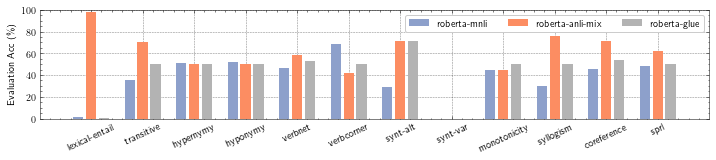

In [64]:
x = np.arange(len(task_names1))
width = 0.2
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  ax.bar(x - (width + 0.05), acc_list1_mnli, width, label=label[0], color="#8da0cb")
  ax.bar(x, acc_list1_anli, width, label=label[1], color="#fc8d62")
  ax.bar(x + (width + 0.05), acc_list1_glue, width, label=label[2], color="#b3b3b3")

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names1)
  #ax.set_title('Curriculum Benchmark')
  ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 12])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_1.pdf')

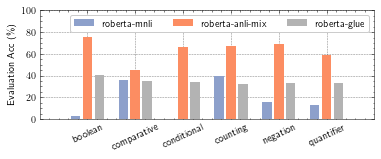

In [65]:


x = np.arange(len(task_names2))
width = 0.2
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(6, 2))
  ax = fig.add_subplot(111)
  ax.bar(x - (width + 0.05), acc_list2_mnli, width, label=label[0], color="#8da0cb")
  ax.bar(x, acc_list2_anli, width, label=label[1], color="#fc8d62")
  ax.bar(x + (width + 0.05), acc_list2_glue, width, label=label[2], color="#b3b3b3")

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names2)
  #ax.set_title('Curriculum Benchmark')
  #ax.legend(title='Label', loc="lower center", ncol=3, bbox_to_anchor=(0.5, 1.2))
  ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 6])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_2.pdf')

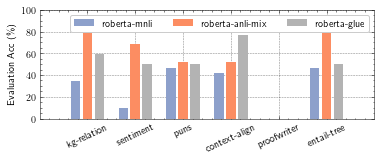

In [69]:
x = np.arange(len(task_names3))
width = 0.2
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(6, 2))
  ax = fig.add_subplot(111)
  ax.bar(x - (width + 0.05), acc_list3_mnli, width, label=label[0], color="#8da0cb")
  ax.bar(x, acc_list3_anli, width, label=label[1], color="#fc8d62")
  ax.bar(x + (width + 0.05), acc_list3_glue, width, label=label[2], color="#b3b3b3")

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names3)
  # ax.set_title('Curriculum Benchmark')
  # ax.legend(title='Label', loc="lower center", ncol=3, bbox_to_anchor=(0.5, 1.2))
  ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 6])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_3.pdf')

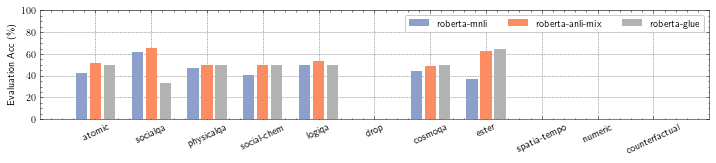

In [68]:
x = np.arange(len(task_names4))
width = 0.2
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  ax.bar(x - (width + 0.05), acc_list4_mnli, width, label=label[0], color="#8da0cb")
  ax.bar(x, acc_list4_anli, width, label=label[1], color="#fc8d62")
  ax.bar(x + (width + 0.05), acc_list4_glue, width, label=label[2], color="#b3b3b3")

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names4)
  # ax.set_title('Curriculum Benchmark')
  # ax.legend(title='Label', loc="lower center", ncol=3, bbox_to_anchor=(0.5, 1.2))
  # ax.legend(title='Label', loc="upper right")
  ax.legend(loc="upper right", ncol=3)
  ax.set_xlim([-1, 11])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_4.pdf')